In [1]:
!pip install gensim
!pip install matplotlib
!pip install -U scikit-learn
!pip install torch_geometric
!pip install networkx
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu117


# Graph Construction

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()

# add nodes to graph
num_nodes = 20
for i in range(num_nodes):
    G.add_node(f"{i}")

# add # of edges (connect randomly) to graph
num_edges = 30
for _ in range(num_edges):
    source = random.choice(list(G.nodes()))
    target = random.choice(list(G.nodes()))
    if source != target and not G.has_edge(source, target):
        G.add_edge(source, target)

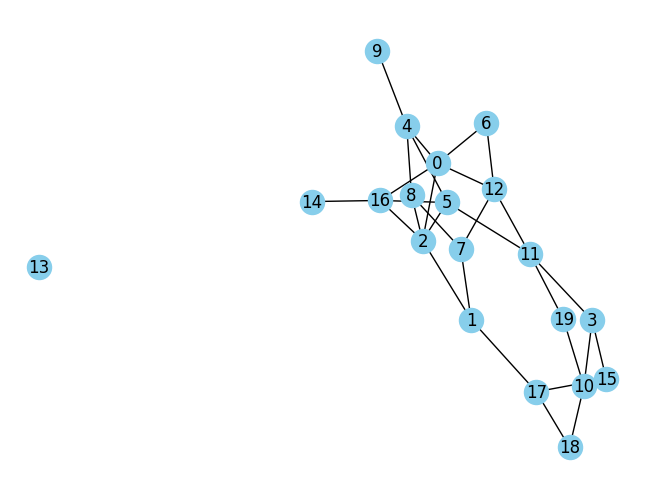

In [3]:
# visualization
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue")
plt.show()

# Random Walk

In [4]:
def random_walk(graph, start_node, num_steps):
    result = []
    current_node = start_node
    for _ in range(num_steps):
        result.append(current_node)
        neighbors = list(graph .neighbors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)

    return result

In [5]:
start_node = random.choice(list(G.nodes())) # Choose random node as a starting node
num_steps = 10  # the number of steps for random walk (length of sequence)

print("Random Walk:")

result = random_walk(G, start_node, num_steps)
print(result)

Random Walk:
['0', '2', '5', '16', '5', '4', '8', '7', '8', '4']


# DeepWalk

In [6]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

## Creating a dataset and run DeepWalk

In [7]:
dataset = [random_walk(G, start_node=random.choice(list(G.nodes)), num_steps=20) for _ in range(100)]
for seq in dataset:
    print(seq)

['4', '0', '12', '6', '0', '16', '14', '16', '5', '4', '5', '4', '8', '2', '8', '2', '1', '7', '8', '7']
['0', '2', '5', '2', '16', '14', '16', '5', '2', '8', '4', '9', '4', '8', '7', '1', '7', '12', '6', '12']
['11', '12', '6', '0', '4', '9', '4', '9', '4', '0', '16', '2', '8', '2', '1', '17', '15', '3', '11', '12']
['16', '2', '16', '2', '16', '14', '16', '14', '16', '14', '16', '14', '16', '0', '6', '12', '7', '8', '2', '5']
['17', '18', '17', '18', '17', '15', '3', '10', '18', '17', '1', '17', '1', '2', '8', '4', '8', '7', '1', '7']
['0', '16', '14', '16', '14', '16', '0', '16', '2', '1', '17', '1', '17', '18', '17', '1', '7', '8', '2', '8']
['3', '10', '3', '10', '19', '11', '5', '4', '8', '2', '1', '7', '12', '6', '12', '0', '2', '5', '11', '5']
['18', '10', '3', '15', '3', '11', '5', '4', '9', '4', '5', '4', '9', '4', '0', '6', '12', '0', '6', '0']
['7', '8', '2', '5', '4', '9', '4', '9', '4', '9', '4', '9', '4', '9', '4', '9', '4', '0', '12', '0']
['18', '10', '18', '17', '15',

In [8]:
deepwalk = Word2Vec(dataset, vector_size=300, sg=1, epochs=100)

In [9]:
sorted(deepwalk.wv.index_to_key)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [10]:
# Print result of DeepWalk
print(deepwalk.wv["1"])
print(deepwalk.wv["1"].shape)

[ 4.78195623e-02  5.28745465e-02 -1.24107368e-01 -1.01490198e-02
 -2.47808415e-02 -1.14552021e-01  1.33817434e-01  9.75507349e-02
  2.49906015e-02  1.35892192e-02  6.55965284e-02 -6.25353679e-02
 -3.18809375e-02  7.68901557e-02 -4.72710617e-02 -5.61713092e-02
  1.04874149e-01  2.14084499e-02 -2.57346798e-02  1.08476244e-01
 -2.50514615e-02 -8.12303945e-02 -2.75551109e-04  7.19605610e-02
 -1.02329642e-01 -1.08758904e-01 -2.58920174e-02 -3.92922089e-02
 -3.63946892e-02 -1.80635720e-01  1.42326891e-01 -1.05607755e-01
  9.39832926e-02 -5.14202341e-02 -8.86026304e-03 -2.45475140e-03
  7.23034516e-02  8.55169818e-02 -1.88893043e-02  2.13776454e-02
 -9.45757776e-02  1.21801393e-02  4.10492048e-02 -7.44916052e-02
  5.78730144e-02  2.67809965e-02 -1.92259066e-02  4.98097800e-02
  4.60370556e-02  3.10923345e-02 -1.87552869e-02 -7.66695105e-03
 -6.99998662e-02 -7.28229759e-03  2.30530165e-02  7.17671216e-02
  6.09173812e-02 -1.66853182e-02  1.09238580e-01  5.07924519e-03
 -2.48178616e-02 -3.34609

# Node2Vec

In [11]:
def node2vec_walk(G, start_node, num_steps, p, q):
    walk = [start_node]

    for _ in range(num_steps - 1):
        current_node = walk[-1]
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            walk.append(next_node)
        else:
            break

    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    for neighbor in neighbors:
        if neighbor == previous_node:
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            unnormalized_weights.append(1.0)
        else:
            unnormalized_weights.append(1.0 / q)

    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    return random.choices(neighbors, weights=norm_weights)[0]

In [12]:
dataset2 = [node2vec_walk(G, start_node=random.choice(list(G.nodes)), num_steps=10, p=0.8, q=0.2) for _ in range(100)]
for i in dataset:
    print(i)

['4', '0', '12', '6', '0', '16', '14', '16', '5', '4', '5', '4', '8', '2', '8', '2', '1', '7', '8', '7']
['0', '2', '5', '2', '16', '14', '16', '5', '2', '8', '4', '9', '4', '8', '7', '1', '7', '12', '6', '12']
['11', '12', '6', '0', '4', '9', '4', '9', '4', '0', '16', '2', '8', '2', '1', '17', '15', '3', '11', '12']
['16', '2', '16', '2', '16', '14', '16', '14', '16', '14', '16', '14', '16', '0', '6', '12', '7', '8', '2', '5']
['17', '18', '17', '18', '17', '15', '3', '10', '18', '17', '1', '17', '1', '2', '8', '4', '8', '7', '1', '7']
['0', '16', '14', '16', '14', '16', '0', '16', '2', '1', '17', '1', '17', '18', '17', '1', '7', '8', '2', '8']
['3', '10', '3', '10', '19', '11', '5', '4', '8', '2', '1', '7', '12', '6', '12', '0', '2', '5', '11', '5']
['18', '10', '3', '15', '3', '11', '5', '4', '9', '4', '5', '4', '9', '4', '0', '6', '12', '0', '6', '0']
['7', '8', '2', '5', '4', '9', '4', '9', '4', '9', '4', '9', '4', '9', '4', '9', '4', '0', '12', '0']
['18', '10', '18', '17', '15',

In [13]:
node2vec = Word2Vec(dataset2, vector_size=200, sg=1, epochs=100)
sorted(node2vec.wv.index_to_key)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [14]:
# Print result
print(node2vec.wv["1"])
print(node2vec.wv["1"].shape)

[ 0.05495987 -0.05215708 -0.00991439  0.03742835  0.05337831 -0.03493515
  0.12360308  0.23793694 -0.04542554 -0.10666488 -0.00421235 -0.18558428
  0.04417838  0.11003502 -0.01565721  0.01338594  0.00235753  0.15741242
  0.01931739 -0.19298118  0.09812829 -0.0093634  -0.01603694  0.08202691
  0.01962128  0.03395925 -0.0201087  -0.01504645 -0.01970645 -0.09168261
  0.07866966 -0.0062492   0.08809683 -0.08905031 -0.02476747 -0.04505589
  0.12771861 -0.01415429 -0.03327465 -0.05040484 -0.02602692 -0.1013386
 -0.0149294   0.04622966  0.03787012 -0.10136581 -0.0072317  -0.07187284
  0.09744021  0.02761418  0.00035316 -0.09911893 -0.06760137 -0.02472729
  0.05144492  0.01928771  0.00508153 -0.10347173  0.03213601  0.0201563
 -0.02953081 -0.04889931  0.22069207  0.09507106 -0.1910152   0.20065029
 -0.05005342  0.1035753  -0.14554101  0.12571335  0.08001388  0.06963684
  0.13034044  0.02395345  0.10272931  0.02586981  0.10233285  0.04780243
 -0.09374087 -0.02508752 -0.10252166 -0.0741405  -0.0

# LINE: Large-scale Information Network Embedding

## Alias Sampling

In [17]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution.
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes


## LINE Model

In [19]:
class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        self.embed_dim = embed_dim
        self.order = order
        self.nodes_embeddings = nn.Embedding(size, embed_dim)

        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialization
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(
                -.5, .5) / embed_dim

        # Initialization
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(
            -.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):

        v_i = self.nodes_embeddings(v_i).to(device)

        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        loss = positivebatch + negativebatch
        return -torch.mean(loss)

### Main running

In [20]:
G2 = nx.Graph()

G2.add_nodes_from(range(1, num_nodes + 1))

for i in range(1, num_nodes + 1):
    for j in range(i + 1, num_nodes + 1):
        weight = random.uniform(1, 10)
        G2.add_edge(i, j, weight=weight)

for edge in G2.edges(data=True):
    print(f"Edge: {edge[0]} - {edge[1]}, Weight: {edge[2]['weight']}")

Edge: 1 - 2, Weight: 2.5779736211950968
Edge: 1 - 3, Weight: 9.595803346639384
Edge: 1 - 4, Weight: 1.8683230110193279
Edge: 1 - 5, Weight: 4.4863299552093885
Edge: 1 - 6, Weight: 3.492938548756947
Edge: 1 - 7, Weight: 4.5407227030644
Edge: 1 - 8, Weight: 5.063450674827217
Edge: 1 - 9, Weight: 6.851511484785915
Edge: 1 - 10, Weight: 7.042670888564814
Edge: 1 - 11, Weight: 6.236434369189794
Edge: 1 - 12, Weight: 1.0519859725833856
Edge: 1 - 13, Weight: 9.66580365058778
Edge: 1 - 14, Weight: 6.224424285601338
Edge: 1 - 15, Weight: 9.254582478693909
Edge: 1 - 16, Weight: 8.271086347365259
Edge: 1 - 17, Weight: 8.809892159615861
Edge: 1 - 18, Weight: 2.67005538978588
Edge: 1 - 19, Weight: 9.79718014474079
Edge: 1 - 20, Weight: 9.566092467840846
Edge: 2 - 3, Weight: 5.025235656379006
Edge: 2 - 4, Weight: 3.947855584530782
Edge: 2 - 5, Weight: 9.11049930867016
Edge: 2 - 6, Weight: 4.69768174765376
Edge: 2 - 7, Weight: 3.8183117259111103
Edge: 2 - 8, Weight: 7.351342098589148
Edge: 2 - 9, Wei

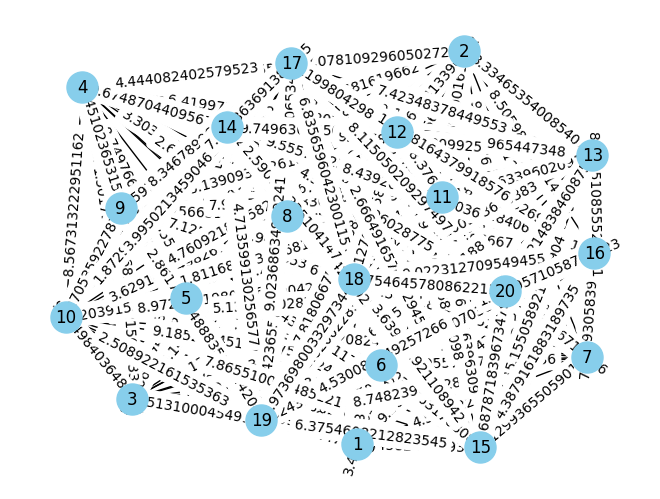

In [21]:
# Visualization
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, with_labels=True, node_size=500, node_color="skyblue")
labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
plt.show()

In [22]:
from tqdm import trange
import torch
import torch.optim as optim
import sys
import pickle

args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(
    G2, args["neg_power"])

edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

opt = optim.SGD(line.parameters(), lr=args["lr"],
                    momentum=0.9, nesterov=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}...\n".format(device))
for epoch in range(args["epochs"]):
    print("Epoch {}".format(epoch))
    for b in trange(batchrange):
        samplededges = edgesaliassampler.sample_n(args["batch_size"])
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees,
                                  nodesaliassampler))
        batch = torch.LongTensor(batch)
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]
        line.zero_grad()
        loss = line(v_i, v_j, negsamples, device)
        loss.backward()
        opt.step()

        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

190it [00:00, 88585.79it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 190/190 [00:00<00:00, 117280.02it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 19/19 [00:00<00:00, 19878.22it/s]


2/2. Building alias table...
20

Training on cpu...

Epoch 0


100%|██████████| 19/19 [00:00<00:00, 43.30it/s]


Epoch 1


100%|██████████| 19/19 [00:00<00:00, 64.15it/s]


Epoch 2


100%|██████████| 19/19 [00:00<00:00, 43.08it/s]


Epoch 3


100%|██████████| 19/19 [00:00<00:00, 49.17it/s]


Epoch 4


100%|██████████| 19/19 [00:00<00:00, 67.25it/s]


Epoch 5


100%|██████████| 19/19 [00:00<00:00, 121.79it/s]


Epoch 6


100%|██████████| 19/19 [00:00<00:00, 341.43it/s]


Epoch 7


100%|██████████| 19/19 [00:00<00:00, 441.30it/s]


Epoch 8


100%|██████████| 19/19 [00:00<00:00, 291.06it/s]


Epoch 9


100%|██████████| 19/19 [00:00<00:00, 379.24it/s]


Epoch 10


100%|██████████| 19/19 [00:00<00:00, 333.86it/s]


Epoch 11


100%|██████████| 19/19 [00:00<00:00, 306.28it/s]


Epoch 12


100%|██████████| 19/19 [00:00<00:00, 320.48it/s]


Epoch 13


100%|██████████| 19/19 [00:00<00:00, 364.41it/s]


Epoch 14


100%|██████████| 19/19 [00:00<00:00, 172.07it/s]


Epoch 15


100%|██████████| 19/19 [00:00<00:00, 226.92it/s]


Epoch 16


100%|██████████| 19/19 [00:00<00:00, 318.06it/s]


Epoch 17


100%|██████████| 19/19 [00:00<00:00, 299.23it/s]


Epoch 18


100%|██████████| 19/19 [00:00<00:00, 222.42it/s]


Epoch 19


100%|██████████| 19/19 [00:00<00:00, 245.98it/s]


Epoch 20


100%|██████████| 19/19 [00:00<00:00, 198.12it/s]


Epoch 21


100%|██████████| 19/19 [00:00<00:00, 355.04it/s]


Epoch 22


100%|██████████| 19/19 [00:00<00:00, 320.71it/s]


Epoch 23


100%|██████████| 19/19 [00:00<00:00, 377.36it/s]


Epoch 24


100%|██████████| 19/19 [00:00<00:00, 490.28it/s]


Epoch 25


100%|██████████| 19/19 [00:00<00:00, 454.23it/s]


Epoch 26


100%|██████████| 19/19 [00:00<00:00, 528.37it/s]


Epoch 27


100%|██████████| 19/19 [00:00<00:00, 563.94it/s]


Epoch 28


100%|██████████| 19/19 [00:00<00:00, 333.08it/s]


Epoch 29


100%|██████████| 19/19 [00:00<00:00, 537.86it/s]


Epoch 30


100%|██████████| 19/19 [00:00<00:00, 417.86it/s]


Epoch 31


100%|██████████| 19/19 [00:00<00:00, 429.68it/s]


Epoch 32


100%|██████████| 19/19 [00:00<00:00, 382.85it/s]


Epoch 33


100%|██████████| 19/19 [00:00<00:00, 399.99it/s]


Epoch 34


100%|██████████| 19/19 [00:00<00:00, 474.30it/s]


Epoch 35


100%|██████████| 19/19 [00:00<00:00, 402.57it/s]


Epoch 36


100%|██████████| 19/19 [00:00<00:00, 398.55it/s]


Epoch 37


100%|██████████| 19/19 [00:00<00:00, 452.93it/s]


Epoch 38


100%|██████████| 19/19 [00:00<00:00, 500.29it/s]


Epoch 39


100%|██████████| 19/19 [00:00<00:00, 458.41it/s]


Epoch 40


100%|██████████| 19/19 [00:00<00:00, 517.89it/s]


Epoch 41


100%|██████████| 19/19 [00:00<00:00, 484.34it/s]


Epoch 42


100%|██████████| 19/19 [00:00<00:00, 515.25it/s]


Epoch 43


100%|██████████| 19/19 [00:00<00:00, 517.81it/s]


Epoch 44


100%|██████████| 19/19 [00:00<00:00, 510.34it/s]


Epoch 45


100%|██████████| 19/19 [00:00<00:00, 530.50it/s]


Epoch 46


100%|██████████| 19/19 [00:00<00:00, 501.86it/s]


Epoch 47


100%|██████████| 19/19 [00:00<00:00, 399.54it/s]


Epoch 48


100%|██████████| 19/19 [00:00<00:00, 377.96it/s]


Epoch 49


100%|██████████| 19/19 [00:00<00:00, 389.45it/s]


Epoch 50


100%|██████████| 19/19 [00:00<00:00, 314.99it/s]


Epoch 51


100%|██████████| 19/19 [00:00<00:00, 425.33it/s]


Epoch 52


100%|██████████| 19/19 [00:00<00:00, 403.96it/s]


Epoch 53


100%|██████████| 19/19 [00:00<00:00, 348.83it/s]


Epoch 54


100%|██████████| 19/19 [00:00<00:00, 390.78it/s]


Epoch 55


100%|██████████| 19/19 [00:00<00:00, 392.85it/s]


Epoch 56


100%|██████████| 19/19 [00:00<00:00, 365.90it/s]


Epoch 57


100%|██████████| 19/19 [00:00<00:00, 426.10it/s]


Epoch 58


100%|██████████| 19/19 [00:00<00:00, 391.74it/s]


Epoch 59


100%|██████████| 19/19 [00:00<00:00, 409.51it/s]


Epoch 60


100%|██████████| 19/19 [00:00<00:00, 440.68it/s]


Epoch 61


100%|██████████| 19/19 [00:00<00:00, 393.58it/s]


Epoch 62


100%|██████████| 19/19 [00:00<00:00, 421.60it/s]


Epoch 63


100%|██████████| 19/19 [00:00<00:00, 437.46it/s]


Epoch 64


100%|██████████| 19/19 [00:00<00:00, 458.89it/s]


Epoch 65


100%|██████████| 19/19 [00:00<00:00, 492.76it/s]


Epoch 66


100%|██████████| 19/19 [00:00<00:00, 382.56it/s]


Epoch 67


100%|██████████| 19/19 [00:00<00:00, 387.22it/s]


Epoch 68


100%|██████████| 19/19 [00:00<00:00, 576.77it/s]


Epoch 69


100%|██████████| 19/19 [00:00<00:00, 694.55it/s]


Epoch 70


100%|██████████| 19/19 [00:00<00:00, 628.10it/s]


Epoch 71


100%|██████████| 19/19 [00:00<00:00, 685.66it/s]


Epoch 72


100%|██████████| 19/19 [00:00<00:00, 679.93it/s]


Epoch 73


100%|██████████| 19/19 [00:00<00:00, 677.49it/s]


Epoch 74


100%|██████████| 19/19 [00:00<00:00, 603.41it/s]


Epoch 75


100%|██████████| 19/19 [00:00<00:00, 655.38it/s]


Epoch 76


100%|██████████| 19/19 [00:00<00:00, 689.61it/s]


Epoch 77


100%|██████████| 19/19 [00:00<00:00, 588.89it/s]


Epoch 78


100%|██████████| 19/19 [00:00<00:00, 571.60it/s]


Epoch 79


100%|██████████| 19/19 [00:00<00:00, 535.42it/s]


Epoch 80


100%|██████████| 19/19 [00:00<00:00, 490.65it/s]


Epoch 81


100%|██████████| 19/19 [00:00<00:00, 479.79it/s]


Epoch 82


100%|██████████| 19/19 [00:00<00:00, 558.75it/s]


Epoch 83


100%|██████████| 19/19 [00:00<00:00, 569.15it/s]


Epoch 84


100%|██████████| 19/19 [00:00<00:00, 579.50it/s]


Epoch 85


100%|██████████| 19/19 [00:00<00:00, 524.33it/s]


Epoch 86


100%|██████████| 19/19 [00:00<00:00, 555.50it/s]


Epoch 87


100%|██████████| 19/19 [00:00<00:00, 466.35it/s]


Epoch 88


100%|██████████| 19/19 [00:00<00:00, 528.00it/s]


Epoch 89


100%|██████████| 19/19 [00:00<00:00, 561.60it/s]


Epoch 90


100%|██████████| 19/19 [00:00<00:00, 501.65it/s]


Epoch 91


100%|██████████| 19/19 [00:00<00:00, 354.30it/s]


Epoch 92


100%|██████████| 19/19 [00:00<00:00, 600.47it/s]


Epoch 93


100%|██████████| 19/19 [00:00<00:00, 557.56it/s]


Epoch 94


100%|██████████| 19/19 [00:00<00:00, 383.74it/s]


Epoch 95


100%|██████████| 19/19 [00:00<00:00, 396.76it/s]

Epoch 96

100%|██████████| 19/19 [00:00<00:00, 562.74it/s]


Epoch 97


100%|██████████| 19/19 [00:00<00:00, 566.07it/s]


Epoch 98


100%|██████████| 19/19 [00:00<00:00, 522.39it/s]


Epoch 99


100%|██████████| 19/19 [00:00<00:00, 502.22it/s]


# Randomwalk of Metapath2Vec

In [23]:
import networkx as nx
import random

In [24]:
# Import the Karate Club graph using NetworkX and create an adjacency matrix
karate_graph = nx.karate_club_graph()
adjacency_list = nx.adjacency_matrix(karate_graph, dtype=int)
adjacency_matrix_array = adjacency_list.toarray()

# Define the metapaths
metapaths = [["Member", "Club", "Member"], ["Member", "Club", "Member", "Club", "Member"]]

def random_walk_metapath2vec(adj_list, node, metapath, walk_length):
  walk = [node]        # Walk starts from this node

  for i in range(walk_length-1):
    next_hop_candidates = []
    current_node = walk[-1]
    for j in range(len(metapath)):
      if current_node in adj_list and metapath[j] in adj_list[current_node]:
        next_hop_candidates.extend(adj_list[current_node][metapath[j]])
    if len(next_hop_candidates) > 0:
      next_node = random.choice(next_hop_candidates)
    else:
      next_node = random.choice(adj_list[current_node])
    walk.append(next_node)

  return walk

# Perform random walks on the graph using metapath2vec
num_walks = 6

for node in karate_graph.nodes():
  for metapath in metapaths:
    print("Node " + str(node) + " using metapath " + str(metapath) + " :" + str(random_walk_metapath2vec(adjacency_matrix_array, node, metapath, num_walks)))



Node 0 using metapath ['Member', 'Club', 'Member'] :[0, 0, 3, 0, 0, 0]
Node 0 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[0, 2, 0, 0, 0, 2]
Node 1 using metapath ['Member', 'Club', 'Member'] :[1, 0, 0, 0, 5, 0]
Node 1 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[1, 0, 0, 0, 0, 2]
Node 2 using metapath ['Member', 'Club', 'Member'] :[2, 1, 0, 3, 3, 0]
Node 2 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[2, 0, 2, 0, 0, 0]
Node 3 using metapath ['Member', 'Club', 'Member'] :[3, 0, 0, 3, 0, 2]
Node 3 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[3, 3, 0, 0, 0, 3]
Node 4 using metapath ['Member', 'Club', 'Member'] :[4, 0, 0, 2, 0, 0]
Node 4 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[4, 0, 2, 0, 4, 0]
Node 5 using metapath ['Member', 'Club', 'Member'] :[5, 0, 0, 2, 0, 3]
Node 5 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[5, 0, 3, 0, 0, 4]
Node 6 using metapath ['Member', 'Club',

In [25]:
adjacency_matrix_array

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])